In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split



2024-02-27 04:01:44.003936: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 04:01:44.291792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 04:01:44.291858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 04:01:44.338235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 04:01:44.427180: I tensorflow/core/platform/cpu_feature_guar

In [2]:
class_labels = os.listdir('train_labled')
class_labels

['negative', 'positive']

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('train_labled',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale',
                                                 shuffle = True,)

val_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = val_datagen.flow_from_directory('val_labled',
                                                   target_size = (256, 256),
                                                   batch_size = 32,
                                                   class_mode = 'binary',
                                                   color_mode = 'grayscale',
                                                   shuffle = False)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test_labled',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            color_mode = 'grayscale',
                                            shuffle = False)

Found 67863 images belonging to 2 classes.
Found 8473 images belonging to 2 classes.
Found 8482 images belonging to 2 classes.


In [4]:
type(training_set)

keras.src.preprocessing.image.DirectoryIterator

## Shallow Arch

In [5]:
input_shape= (256,256,1)
model_3 = Sequential([
    Conv2D(32,(3,3), activation = 'relu', padding ='same', input_shape = input_shape),
    Conv2D(32,(3,3), activation = 'relu', padding='same'),
    Conv2D(32,(3,3),activation = 'relu', padding = 'same', strides =(2,2)),
    
    Conv2D(64,(3,3), activation = 'relu', padding = 'same'),
    Conv2D(64,(3,3), activation = 'relu', padding = 'same'),
    Conv2D(64,(3,3), activation = 'relu', padding = 'same', strides = (2,2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1 , activation = 'sigmoid')
])
model_3.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
model_3.summary()

2024-02-27 04:01:49.330087: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 262144)            0

2024-02-27 04:01:49.502181: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 04:01:49.502236: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 04:01:49.505456: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 04:01:49.505508: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 04:01:49.505524: I external/local_xla/xla/stream_executor

In [7]:
with tf.device('/gpu:1'):
    model_3.fit(training_set,validation_data= validation_set ,epochs=16)

Epoch 1/16


2024-02-27 04:01:51.076739: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-27 04:01:51.436222: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-27 04:01:52.892303: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-27 04:01:53.236128: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f46b9d99f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-27 04:01:53.236174: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-27 04:01:53.247852: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708986713.321861     976 devic

 330/2121 [===>..........................] - ETA: 3:20 - loss: 0.4253 - accuracy: 0.8348

2024-02-27 04:02:43.602392: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.62GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-27 04:02:43.888982: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.62GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2121/2121 [==============================] - 319s 144ms/step - loss: 0.2569 - accuracy: 0.9053 - val_loss: 0.4158 - val_accuracy: 0.8527
Epoch 2/16
2121/2121 [==============================] - 302s 142ms/step - loss: 0.1382 - accuracy: 0.9551 - val_loss: 0.3519 - val_accuracy: 0.8773
Epoch 3/16
2121/2121 [==============================] - 304s 143ms/step - loss: 0.0866 - accuracy: 0.9724 - val_loss: 0.3621 - val_accuracy: 0.8958
Epoch 4/16
2121/2121 [==============================] - 303s 143ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.7972 - val_accuracy: 0.8686
Epoch 5/16
2121/2121 [==============================] - 302s 142ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.6865 - val_accuracy: 0.8723
Epoch 6/16
2121/2121 [==============================] - 302s 142ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.6333 - val_accuracy: 0.8959
Epoch 7/16
2121/2121 [==============================] - 302s 142ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 1.008

In [ ]:
import cv2
import os

# Define the folder path and the desired size
folder = "/home/sagnik/ML_Folder/COVIDx CXR-4/test_labled/positive"
size = (256, 256)

# Loop over the files in the folder
for filename in os.listdir(folder):
  # Check if the file is an image
  if filename.endswith(".jpg") or filename.endswith(".png"):
    # Load the image as a numpy array
    img = cv2.imread(os.path.join(folder, filename))
    # Resize the image to the desired size
    img = cv2.resize(img, size)
    # Convert the image to RGB color mode
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Save the image with the same name
    cv2.imwrite(os.path.join(folder, filename), img)


<class 'numpy.ndarray'>
(256, 256, 3)


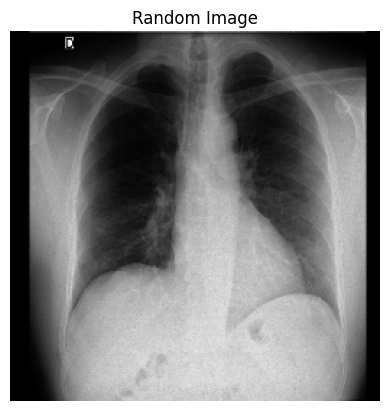

In [ ]:
import matplotlib.pyplot as plt
import random
import cv2
# Specify the path to your image folder
image_folder = "/home/sagnik/ML_Folder/COVIDx CXR-4/test_labled/positive"

# Create an empty list to store the images
images = []

# Loop through the files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".png", ".jpeg", ".bmp")):
        # Check if the file is an image (you can add more file extensions if needed)
        image_path = os.path.join(image_folder, filename)
        
        with Image.open(image_path) as img:
            
            img_array = np.array(img)
            images.append(img_array)

# Now, 'images' contains all the images from the folder



# Check if there are any images in the list
if not images:
    print("No image files found in the folder.")
else:
    # Select a random image from the list
    random_image =  random.choice(images) #images[10]
    #print(model.predict(random_image))
    print(type(random_image))
    print(random_image.shape)
    
    # Open and display the random image
    plt.imshow(random_image)
    plt.title('Random Image')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# assuming x is your input data with shape (32, 256, 3)
#random_image = random_image.reshape(-1, 256, 256, 3) # -1 means infer the batch size automatically
# now x has the shape (32, 256, 256, 3) and can be passed to the model


## Performance on the VALIDATION DATA

In [ ]:
y_val_set = np.concatenate([validation_set.next()[1] for i in range(validation_set.__len__())])
y_val_set = y_val_set.astype(int)
y_val_set = y_val_set.reshape(len(y_val_set), 1)
print(y_val_set)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
y_val = model_3.predict(validation_set)
y_val = (y_val > 0.5)

265/265 [==============================] - 60s 225ms/step


In [ ]:
y_val_round = y_val.astype(int)
print(y_val_round)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
print(np.concatenate((y_val_round.reshape(len(y_val_round), 1), y_val_set.reshape(len(y_val_set), 1)), 1))

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_val_set, y_val_round)
print(cm)
accuracy_score(y_val_set, y_val_round)

[[3574  658]
 [  87 4154]]


0.9120736456980999

## Performance on the TEST DATA

In [ ]:
y_test_set = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
y_test_set = y_test_set.astype(int)
y_test_set = y_test_set.reshape(len(y_test_set), 1)
print(y_test_set)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
y_pred = model_3.predict(test_set)
y_pred = (y_pred > 0.5)

266/266 [==============================] - 43s 162ms/step


In [ ]:
y_pred_round = y_pred.astype(int)
print(y_pred_round)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
print(np.concatenate((y_pred_round.reshape(len(y_pred_round), 1), y_test_set.reshape(len(y_test_set), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_set, y_pred_round)
print(cm)
accuracy_score(y_test_set, y_pred_round)

[[ 297 3944]
 [ 116 4125]]


0.5213393067672719

It was later found out that the data of the test set was faulty . That explains the reason for the bad performance of the model on test data